# Calculate pine fragrance notes

In [92]:
import pandas as pd
from pom_models.functions import fragance_propabilities_from_smiles

In [93]:
import numpy as np

In [94]:
df = pd.read_csv("intensities.csv")
df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-],ODT (theory) [mg/m^3],OV (theory) [-]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.07100,...,2.344229e+04,4.07100,136.125201,1.019800,0.281,5.448859,7346.889389,1348.335352,0.295,24904.709794
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.58100,...,2.344229e+04,4.58100,136.125201,1.019800,0.237,2.686762,3363.807109,1251.993079,9.300,361.699689
2,Caryophyllene oxide,1139-30-6,0.049,(−)-β-Caryophyllene epoxide,0.0±0.6 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,4.57,https://legacy.chemspider.com/Chemical-Structu...,2.21000,...,3.715352e+04,2.21000,220.182715,0.921445,0.049,0.000000,0.000000,NaN,NaN,NaN
3,delta-Cadinene,483-76-1,0.048,d-Cadinene,0.0±0.3 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,0.0,6.54,https://legacy.chemspider.com/Chemical-Structu...,0.04863,...,3.467369e+06,0.04863,204.187801,1.041275,0.048,0.000000,0.000000,NaN,NaN,NaN
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.27500,...,2.344229e+04,6.27500,136.125201,1.015911,0.034,3.481921,860.255616,247.063528,NaN,NaN


In [95]:
top_5_df = df.nlargest(5, "OV [-]")
top_5_df.head()

,name,cas,composition,fetched_name,vapour_pressure,url,vapour_pressure2,logP_value,legacy_url,water_sol_from_logP,...,kow [-],cw [mg/L],M [g/mol],y [-],x [-],ODT [mg/m^3],Cgi [mg/m^3],OV [-],ODT (theory) [mg/m^3],OV (theory) [-]
0,alpha-Pinene,80-56-8,0.281,(+)-α-Pinene,3.5±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.5,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.071,...,23442.288153,4.071,136.125201,1.019800,0.281,5.448859,7346.889389,1348.335352,0.295,24904.709794
1,delta-3-Carene,13466-78-9,0.237,carene,1.9±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.9,4.37,https://legacy.chemspider.com/Chemical-Structu...,4.581,...,23442.288153,4.581,136.125201,1.019800,0.237,2.686762,3363.807109,1251.993079,9.300,361.699689
10,Myrcene,123-35-3,0.021,β-Myrcene,2.3±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,2.3,4.58,https://legacy.chemspider.com/Chemical-Structu...,6.923,...,38018.939632,6.923,136.125201,1.201470,0.021,1.355377,425.083406,313.627406,NaN,NaN
4,Camphene,79-92-5,0.034,Camphene,3.4±0.1 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,3.4,4.37,https://legacy.chemspider.com/Chemical-Structu...,6.275,...,23442.288153,6.275,136.125201,1.015911,0.034,3.481921,860.255616,247.063528,NaN,NaN
8,Terpinolene,586-62-9,0.026,TERPINOLENE,1.1±0.2 mmHg at 25°C,https://www.chemspider.com/Chemical-Structure....,1.1,4.67,https://legacy.chemspider.com/Chemical-Structu...,3.838,...,46773.514129,3.838,136.125201,1.028665,0.026,0.960591,215.503397,224.344482,NaN,NaN


In [96]:
combined_probs = np.zeros(138)
for i, smiles in enumerate(top_5_df["smiles"]):
    probs = fragance_propabilities_from_smiles(smiles)[0]
    weight = list(top_5_df["OV [-]"])[i]
    combined_probs += probs*weight 

combined_probs /= top_5_df["OV [-]"].sum()
max(combined_probs)

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

0.6158640228800495

In [97]:
indices = np.argsort(-combined_probs)
indices

array([ 64, 137,  60,  53,  51,  21,  45,  82,  50, 119, 126,  38, 123,
         4,  30,  99,  31,  58,  23, 110, 125,  86,   5,  85,  73,  44,
        72, 128, 124,  87,  74,  14, 132,  78, 112,  98, 131,  10, 130,
         1,  88, 104,   9,  94,  83,  80, 133,  24,   6,  71,  90, 121,
        56, 117, 114,  75,  16,  69,  95, 107,  39, 135,  62, 134,  92,
        59,  47, 109,  66,   8, 105, 108,  65,   7, 118,  13, 103,  52,
        15,  67,  49, 101,  18,  33,  46,  96, 116,  77,  70,  37, 100,
       113,  41, 111, 106,  79,  93,  40,  28,  48, 102,  29,  26,  63,
        22,  91,  84,  57,  97,  35, 115, 127,  55,  61, 122,  12,   3,
        32,  68,  20,   2, 120,  81,  43,  34, 136,  11,  54,  27,  17,
        25,  19,  76, 129,   0,  42,  89,  36], dtype=int64)

In [98]:
combined_probs[36]

0.032943046050063526

In [99]:
data_df = pd.read_csv("data.csv")
labels = data_df.keys()[2:]

In [100]:
data=[]
labels_lst = []
for i in indices[:8]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([0.6158640228800495,
  0.5614364083664266,
  0.51959569621541,
  0.5144899802871137,
  0.5106596358198845,
  0.5034001017320543,
  0.49506284950736307,
  0.46014884473693335],
 ['herbal',
  'woody',
  'green',
  'fruity',
  'fresh',
  'camphoreous',
  'earthy',
  'mint'])

In [101]:
from pycirclize import Circos
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pinus Sylvestris"],
    columns=labels_lst,
)
pinus_dfs = [df_plot]
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint
Pinus Sylvestris,0.615864,0.561436,0.519596,0.51449,0.51066,0.5034,0.495063,0.460149


In [103]:
target_df = df.loc[1]

<Figure size 1600x1600 with 0 Axes>

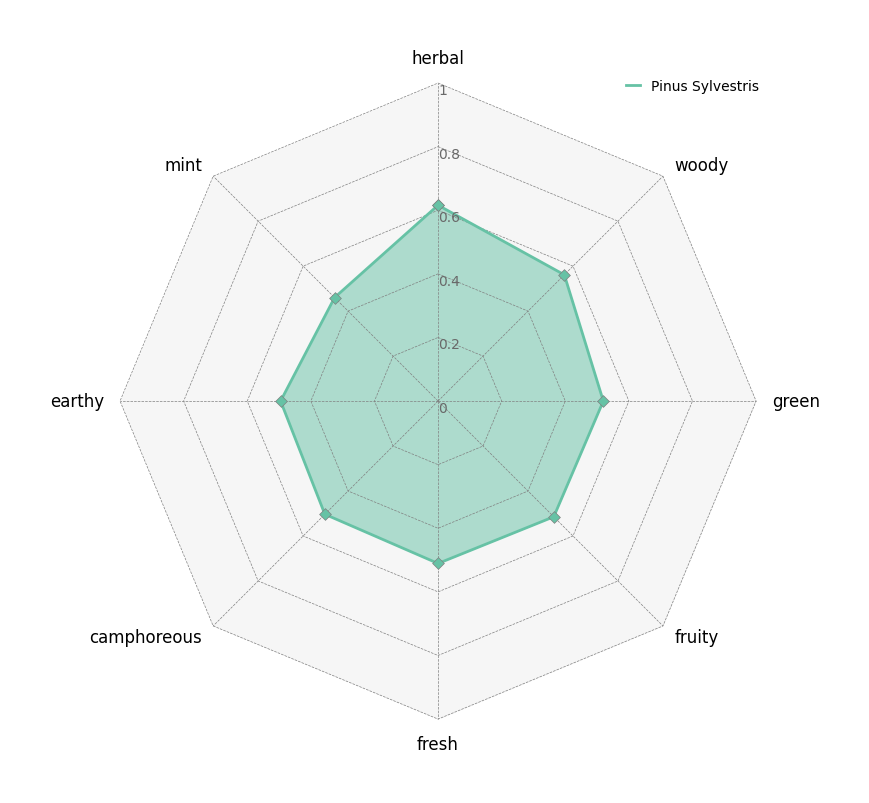

In [104]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=6,
    #cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)



In [105]:
data=[]
labels_lst = []
for i in indices[-8:]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([0.06883266367025447,
  0.06632552447455668,
  0.06569541266778167,
  0.06388515558895021,
  0.06015679738840933,
  0.0567811280777513,
  0.04968711912731084,
  0.032943046050063526],
 ['chamomile',
  'buttery',
  'malty',
  'vanilla',
  'alcoholic',
  'cucumber',
  'odorless',
  'cognac'])

In [106]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pinus Sylvestris"],
    columns=labels_lst,
)
pinus_dfs.append(df_plot)
df_plot

,chamomile,buttery,malty,vanilla,alcoholic,cucumber,odorless,cognac
Pinus Sylvestris,0.068833,0.066326,0.065695,0.063885,0.060157,0.056781,0.049687,0.032943


<Figure size 1600x1600 with 0 Axes>

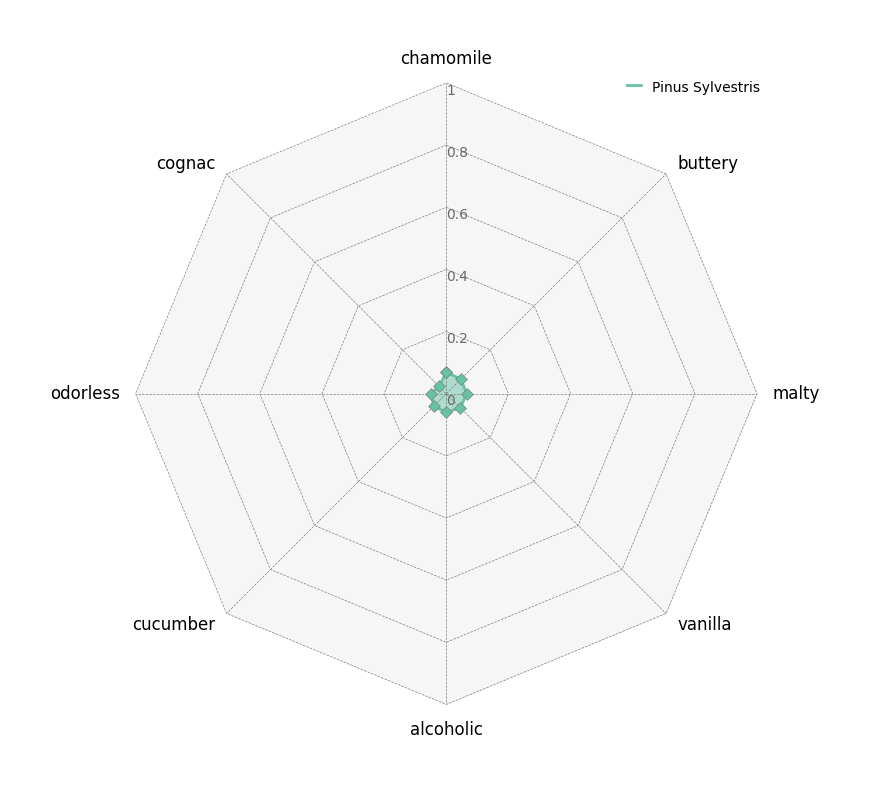

In [107]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=6,
    #cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)

In [108]:
data=[]
labels_lst = []
for i in indices:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([0.6158640228800495,
  0.5614364083664266,
  0.51959569621541,
  0.5144899802871137,
  0.5106596358198845,
  0.5034001017320543,
  0.49506284950736307,
  0.46014884473693335,
  0.4518114798301955,
  0.4392938453752424,
  0.3549541641082579,
  0.34796384320511364,
  0.3401378790057039,
  0.33611651818681026,
  0.3205061446731162,
  0.30612350403167105,
  0.3016804498095253,
  0.29628354544382557,
  0.2949652432498446,
  0.28331944331086667,
  0.27795827154894726,
  0.27722394969529546,
  0.2683353735141846,
  0.2650988837150235,
  0.26032652240935844,
  0.2593262748697287,
  0.25842880293452325,
  0.2564221216109083,
  0.2462721961226025,
  0.24401940256066418,
  0.23711674152881024,
  0.23600614840486922,
  0.22505541640180823,
  0.22277911060403754,
  0.21750902650126439,
  0.21699264750111985,
  0.21595605605760723,
  0.2132034207126755,
  0.21170305081175647,
  0.2096520848804386,
  0.20631412489836246,
  0.20283225529418047,
  0.20086818243282617,
  0.19483285539600836,
  0.190178

In [109]:
df_plot = pd.DataFrame(
    data=[
        data,
    ],
    index=["Pine"],
    columns=labels_lst,
)
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint,floral,spicy,...,cherry,brandy,chamomile,buttery,malty,vanilla,alcoholic,cucumber,odorless,cognac
Pine,0.615864,0.561436,0.519596,0.51449,0.51066,0.5034,0.495063,0.460149,0.451811,0.439294,...,0.071618,0.069468,0.068833,0.066326,0.065695,0.063885,0.060157,0.056781,0.049687,0.032943


<Figure size 1600x1600 with 0 Axes>

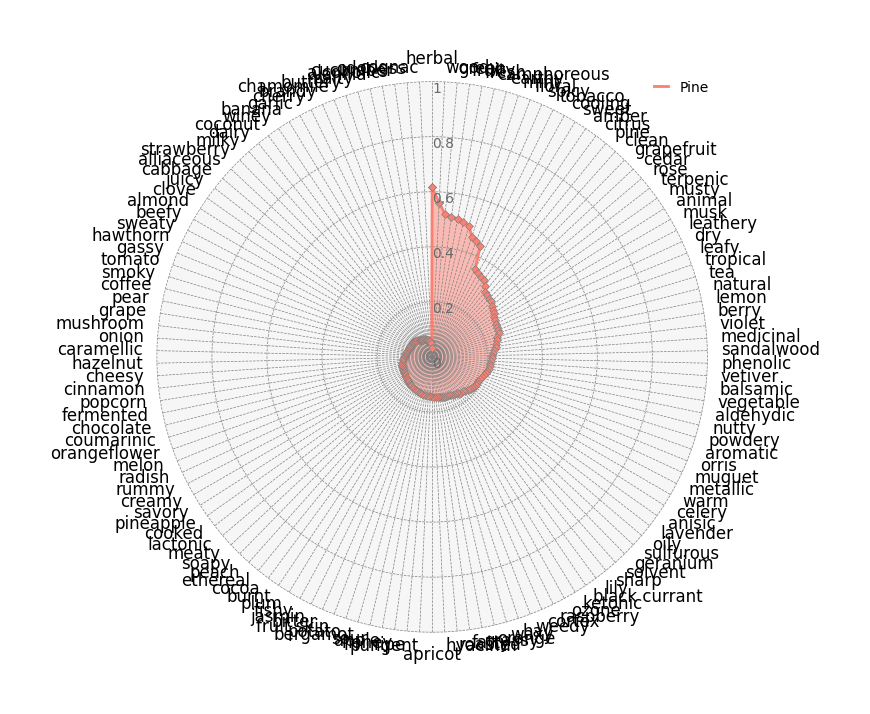

In [110]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=4,
    cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=10)

In [111]:
import json

In [112]:
list(combined_probs)

[0.06015679738840933,
 0.2096520848804386,
 0.08337212983168577,
 0.08833910965233836,
 0.33611651818681026,
 0.2683353735141846,
 0.18713417120227516,
 0.14195575260378707,
 0.14449604032223276,
 0.20086818243282617,
 0.2132034207126755,
 0.07270558673900183,
 0.08896248758001175,
 0.13861516825684683,
 0.23600614840486922,
 0.13562119613872434,
 0.15948043746026003,
 0.06946793856840223,
 0.1308044386701302,
 0.06632552447455668,
 0.08598226886908046,
 0.5034001017320543,
 0.09890932734264743,
 0.2949652432498446,
 0.18833663737922687,
 0.06883266367025447,
 0.10587180789255148,
 0.07161808864561585,
 0.1121648297552572,
 0.10791982549812146,
 0.3205061446731162,
 0.3016804498095253,
 0.08729671677365931,
 0.13039261903120677,
 0.0757116518943597,
 0.09356458180606332,
 0.032943046050063526,
 0.12056190994915207,
 0.34796384320511364,
 0.1525630652238192,
 0.1136068681045508,
 0.11699377660423649,
 0.0567811280777513,
 0.07754659676447415,
 0.2593262748697287,
 0.49506284950736307,
 

In [113]:
from rdkit import Chem

In [114]:
with open("pine_target_2.json", "w") as file:
    json.dump(list(combined_probs), file)

In [115]:
mol_dict = {}
for i, smiles in enumerate(top_5_df["smiles"]):
    probs = fragance_propabilities_from_smiles(smiles)[0]
    weight = list(top_5_df["OV [-]"])[i]
    mol = Chem.MolFromSmiles(smiles)
    
    data_cut=[]
    for j in indices[:8]:
        data_cut.append(probs[j])
    mol_dict[i] = {
        "probs":probs,
        "weight":weight,
        "mol": mol,
        "name": f"{list(top_5_df['name'])[i]} {int(weight)}",
        "probs_cut":data_cut
    }


mol_dict  

c:\Users\paulj\Desktop\prosjekt\pom_cpu-model\venv\lib\site-packages\deepchem\models\torch_models\torch_model.py:1078: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  data = t

{0: {'probs': array([0.05670923, 0.1808126 , 0.08197895, 0.08702368, 0.368816  ,
         0.28906935, 0.1939773 , 0.12383256, 0.13714284, 0.20857213,
         0.21608219, 0.06222109, 0.0904218 , 0.11692098, 0.21969016,
         0.13282096, 0.151262  , 0.06394777, 0.13178556, 0.05468661,
         0.08635738, 0.5468689 , 0.09600006, 0.32499614, 0.18578288,
         0.05791685, 0.09458174, 0.06483571, 0.10935425, 0.09815679,
         0.28712583, 0.3117603 , 0.08703233, 0.12712975, 0.06545702,
         0.09906447, 0.02921791, 0.12333379, 0.3650019 , 0.14245135,
         0.11580265, 0.10129152, 0.04067011, 0.06503242, 0.25957048,
         0.53182274, 0.1257142 , 0.12817447, 0.1106156 , 0.13208714,
         0.41869864, 0.51095164, 0.12759477, 0.48822594, 0.0729863 ,
         0.08150066, 0.1547815 , 0.08300035, 0.30056456, 0.13264032,
         0.50306195, 0.08587615, 0.15309407, 0.10244449, 0.6213371 ,
         0.13225503, 0.14059685, 0.11147289, 0.06884795, 0.15039413,
         0.11304887, 0

In [116]:
data=[]
labels_lst = []
for i in indices[:8]:
    labels_lst.append(labels[i])
    data.append(combined_probs[i])

data, labels_lst

([0.6158640228800495,
  0.5614364083664266,
  0.51959569621541,
  0.5144899802871137,
  0.5106596358198845,
  0.5034001017320543,
  0.49506284950736307,
  0.46014884473693335],
 ['herbal',
  'woody',
  'green',
  'fruity',
  'fresh',
  'camphoreous',
  'earthy',
  'mint'])

In [117]:
len(mol_dict.keys())

5

In [118]:
[val["name"] for val in mol_dict.values()]

['alpha-Pinene 1348',
 'delta-3-Carene 1251',
 'Myrcene 313',
 'Camphene 247',
 'Terpinolene 224']

In [119]:
df_plot = pd.DataFrame(
    data=[
        data] +[
        val["probs_cut"] for val in mol_dict.values()
    ],
    index=["Pinus Sylvestris"] + [val["name"] for val in mol_dict.values()],
    columns=labels_lst,
)
df_plot

,herbal,woody,green,fruity,fresh,camphoreous,earthy,mint
Pinus Sylventris,0.615864,0.561436,0.519596,0.514490,0.510660,0.503400,0.495063,0.460149
alpha-Pinene 1348,0.621337,0.583002,0.503062,0.488226,0.510952,0.546869,0.531823,0.474452
delta-3-Carene 1251,0.641944,0.560214,0.531425,0.494507,0.524497,0.529645,0.514406,0.510373
Myrcene 313,0.533750,0.399887,0.642173,0.730840,0.506355,0.204269,0.305198,0.262815
Camphene 247,0.596999,0.607630,0.466937,0.515080,0.482821,0.594434,0.501646,0.464523
Terpinolene 224,0.572994,0.613622,0.439584,0.480758,0.468356,0.413610,0.424360,0.364949


<Figure size 1600x1600 with 0 Axes>

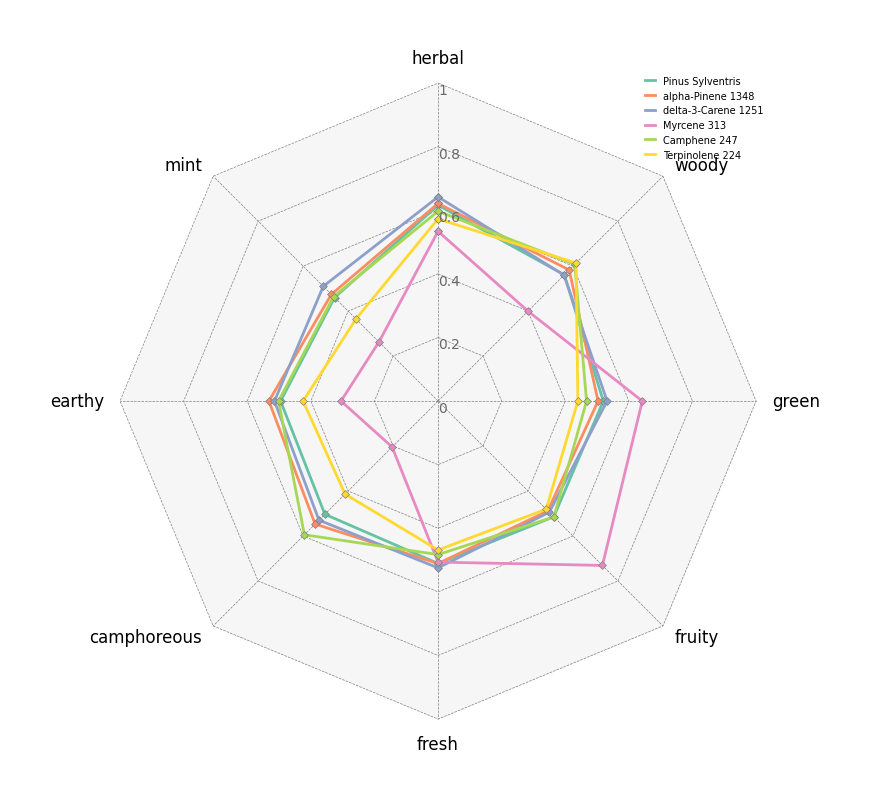

In [120]:

fig = plt.figure(figsize=(16, 16), dpi=100)
target_df = df.loc[1]
# Initialize Circos instance for radar chart plot
circos = Circos.radar_chart(
    df_plot,
    vmax=1,
    marker_size=4,
    fill=False,
    #cmap=dict(Pine="salmon"),
    grid_interval_ratio=0.2,
    line_kws_handler=lambda _: dict(lw=2, ls="solid"),
    marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
)

# Plot figure & set legend on upper right
circos.plotfig()
circos.ax.legend(loc="upper right", fontsize=7)

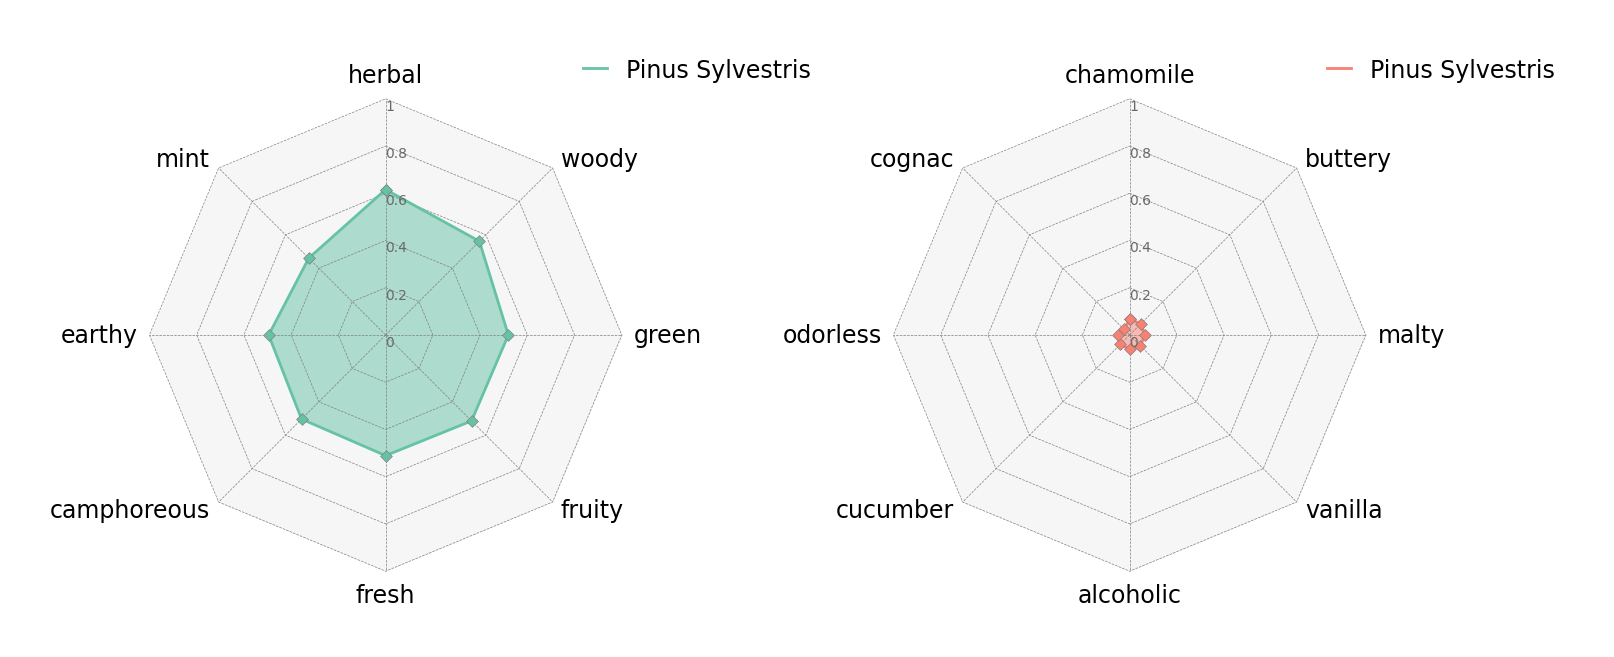

In [152]:
# Create 5 x 5 subplots
fig = plt.figure(figsize=(16, 8), dpi=100)
fig.subplots(1, 2, subplot_kw=dict(polar=True))
fig.subplots_adjust(wspace=0.5, hspace=0.25)
colors = [ "green","salmon","skyblue","salmon","lime","magenta"]
# Plot radar chart into subplots for each target
for i,  ax in enumerate(fig.axes):
    target_df = pinus_dfs[i]
    # Initialize Circos instance for radar chart plot
    if i == 0:
        circos = Circos.radar_chart(
            target_df,
            vmax=1,
            marker_size=6,
            grid_interval_ratio=0.2,
            line_kws_handler=lambda _: dict(lw=2, ls="solid"),
            marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
            label_kws_handler=lambda _: dict(size=17),
        )
    else:
        circos = Circos.radar_chart(
            target_df,
            vmax=1,
            marker_size=6,
            cmap={"Pinus Sylvestris":colors[i]},
            grid_interval_ratio=0.2,
            line_kws_handler=lambda _: dict(lw=2, ls="solid"),
            marker_kws_handler=lambda _: dict(marker="D", ec="grey", lw=0.5),
            label_kws_handler=lambda _: dict(size=17),
        )

    # Plot figure & set legend on upper right
    circos.plotfig(ax=ax)
    circos.ax.legend(loc="upper right", fontsize=17,bbox_to_anchor=(1.4, 1.1))
    fig.savefig("pinus.pdf")
